In [1]:
print("Hello World!")

Hello World!


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

##### Basic

##### Optimization
Minimize f(x) = (x - 3) ** 2

In [3]:
from scipy.optimize import minimize

In [4]:
def f(x):
    return (x - 3) * (x - 3)

res = minimize(f, 2)

res.x[0]

2.999999992549203

Minimize f(x, y) = (x - 1) ^ 2 + (y - 2.5) ^ 2
x - 2y + 2 >= 0
-x -2y + 6 >= 0
-x + 2y + 2 >= 0
x >= 0 y >= 0 

In [5]:
f = lambda x : (x[0] - 1) ** 2 + (x[1] - 2.5) ** 2

f([1, 2])

0.25

In [6]:
cons = ({'type': 'ineq', 'fun': lambda x : x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x : -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x : -x[0] + 2 * x[1] + 2})

bnds = ((0, None), (0, None))

res = minimize(f, (2, 0), bounds = bnds, constraints = cons)
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.8000000011920985
       x: [ 1.400e+00  1.700e+00]
     nit: 3
     jac: [ 8.000e-01 -1.600e+00]
    nfev: 10
    njev: 3

In [16]:
minimize?
# np.random?

Type:        module
String form: <module 'numpy.random' from '/home/shanmukha/.local/lib/python3.10/site-packages/numpy/random/__init__.py'>
File:        ~/.local/lib/python3.10/site-packages/numpy/random/__init__.py
Docstring:  
Random Number Generation

Use ``default_rng()`` to create a `Generator` and call its methods.

=============== =========================================================
Generator
--------------- ---------------------------------------------------------
Generator       Class implementing all of the random number distributions
default_rng     Default constructor for ``Generator``
=============== =========================================================

============================================= ===
BitGenerator Streams that work with Generator
--------------------------------------------- ---
MT19937
PCG64
PCG64DXSM
Philox
SFC64
============================================= ===

============================================= ===
Getting entropy to initialize 

##### Interpolation
Used in science labs

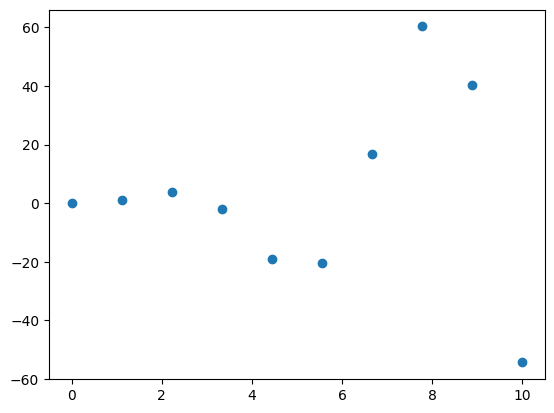

In [7]:
x = np.linspace(0, 10, 10)
y = x ** 2 * np.sin(x)
plt.scatter(x, y)

In [9]:
from scipy.interpolate import interp1d

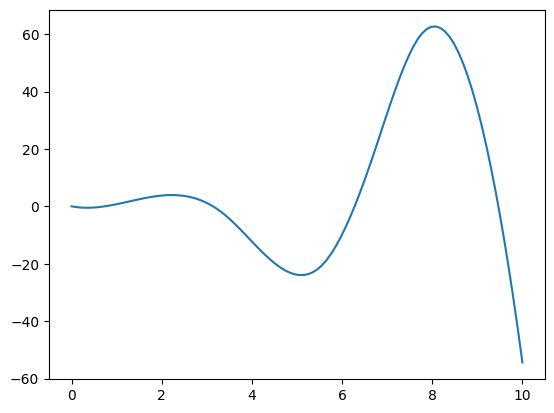

In [16]:
# f = interp1d(x, y, kind = 'linear') 
f = interp1d(x, y, kind = 'cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense) 

# plt.scatter(x_dense, y_dense)
plt.plot(x_dense, y_dense)

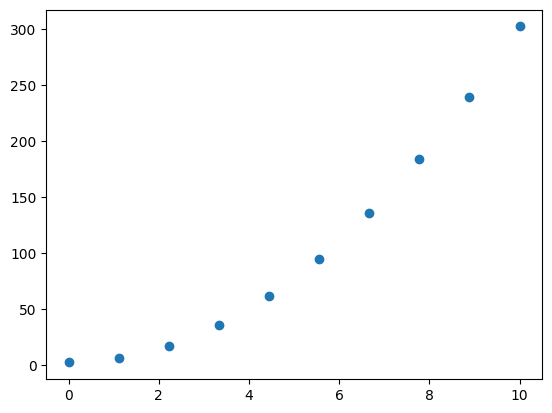

In [17]:
xData = np.linspace(0, 10, 10)
yData = 3 * xData ** 2 + 2
plt.scatter(xData, yData) 

In [18]:
from scipy.optimize import curve_fit

def func(x, a , b):
    return a * x ** 2 + b

# Opt population, Covariance
popt, pcov = curve_fit(func, xData, yData, p0 = (1 ,1))


In [19]:
popt # a, b

array([3., 2.])

##### Skipped to linear algebra

In [23]:
from scipy.linalg import solve_triangular

a = np.array([
    [3, 0, 0, 0],
    [2, 1, 0, 0],
    [1, 0, 1, 0],
    [1, 1, 1, 1]
])

b = np.array([4,2,4,2])

x = solve_triangular(a, b, lower = 1)
x

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

In [24]:
from scipy.linalg import solve_toeplitz, toeplitz

c = np.array([1, 3, 6, 10])
r = np.array([1, -1, -2, -3])
b = np.array([1, 2, 2, 5])
x = solve_toeplitz((c, r), b)
x

array([ 1.66666667, -1.        , -2.66666667,  2.33333333])

In [25]:
from scipy.linalg import eigh_tridiagonal

In [27]:
d = 3 * np.ones(4, dtype = 'long')
e = -1 * np.ones(3, dtype = 'long')
w, v = eigh_tridiagonal(d, e)


In [31]:
w, v
v.T[0]

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

In [35]:
from scipy.linalg import lu
A = np.array([[2, 5, 7, 8], [5,2,2,8], [7,5,6,6], [5,4,4,8]])

In [36]:
A

array([[2, 5, 7, 8],
       [5, 2, 2, 8],
       [7, 5, 6, 6],
       [5, 4, 4, 8]])

In [38]:
p, l, u = lu(A)
p, l, u

(array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.28571429,  1.        ,  0.        ,  0.        ],
        [ 0.71428571,  0.12      ,  1.        ,  0.        ],
        [ 0.71428571, -0.44      , -0.04347826,  1.        ]]),
 array([[ 7.        ,  5.        ,  6.        ,  6.        ],
        [ 0.        ,  3.57142857,  5.28571429,  6.28571429],
        [ 0.        ,  0.        , -0.92      ,  2.96      ],
        [ 0.        ,  0.        ,  0.        ,  6.60869565]]))

##### Choleski Decomposition: find C such that CCT = A

In [39]:
from scipy.linalg import cholesky
A = np.array([[1, 0.2], [0.2, 1]])
A

array([[1. , 0.2],
       [0.2, 1. ]])

In [41]:
C = cholesky(A, lower=1)
C

array([[1.       , 0.       ],
       [0.2      , 0.9797959]])

In [42]:
from scipy.linalg import kron

N = 5
d = (-2) * np.ones(N)
e = np.ones(N-1)
D = np.diag(d) + np.diag(e, k = 1) + np.diag(e, k = -1)
dKronSum = kron(D, np.identity(N)) + kron(np.identity(N), D)

In [47]:
from scipy import sparse
N = 100
diag = np.ones([N])
diags = np.array([diag, (-2) * diag, diag])
D = sparse.spdiags(diags, np.array([1, 0 ,-1]), N, N)

In [50]:
sparse.kronsum(D, D)

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>